Вначале было довольно много экспериментов с использованием l1 и l2 регуляризаций (перебор руками в пределах 1e-9 : 1e-6), которые не привели к значительным успехам (результат на тесте был больше 0.39), поэтому даже графики рисовать не стал. 

Затем я одновременно добавил два параметра:
-q ff 
--ftrl, которые в совокупности сразу дали ощутимый результат

In [11]:
! vw -d train.split.vw -q ff --ftrl --loss_function=logistic -b 30 -f lm.model 

creating quadratic features for pairs: ff 
final_regressor = lm.model
Enabling FTRL based optimization
Algorithm used: Proximal-FTRL
ftrl_alpha = 0.005
ftrl_beta = 0.1
Num weight bits = 30
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = train.split.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000      325
0.571287 0.449427            2            2.0  -1.0000  -0.5667      325
0.766104 0.960921            4            4.0  -1.0000  -0.3883      325
0.669030 0.571955            8            8.0  -1.0000  -0.6733      325
0.602868 0.536707           16           16.0  -1.0000  -1.0404      325
0.589184 0.575500           32           32.0   1.0000  -0.8799      325
0.496034 0.402884           64           64.0  -1.0000  -1.5533      325
0.463791 0.431547          128          1

In [13]:
! vw -d test.split.vw --ftrl -t -i lm.model --loss_function=logistic -p predictions.txt

creating quadratic features for pairs: ff 
only testing
predictions = predictions.txt
Enabling FTRL based optimization
Algorithm used: Proximal-FTRL
ftrl_alpha = 0.005
ftrl_beta = 0.1
Num weight bits = 30
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.split.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.094353 0.094353            1            5.0  -1.0000  -2.3132      325
0.201793 0.291326            3           11.0  -1.0000  -3.9166      325
0.274613 0.328014            6           26.0  -1.0000  -0.6850      325
0.249857 0.225101           12           52.0  -1.0000  -1.6064      325
0.224327 0.200620           24          108.0  -1.0000  -4.3873      325
0.162423 0.102730           48          220.0  -1.0000  -1.0656      325
0.174465 0.186506          100          440.0  -1.0000  -1.6211      325
0.176605 0.178735         

In [20]:
y_pred = map(float, open('./predictions.txt', 'r').readlines())
y_true = map(float, open('./y_test', 'r').readlines())

In [21]:
print len(y_pred), len(y_true)

9999999 9999999


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

In [30]:
roc_auc = roc_auc_score(y_true, y_pred)

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


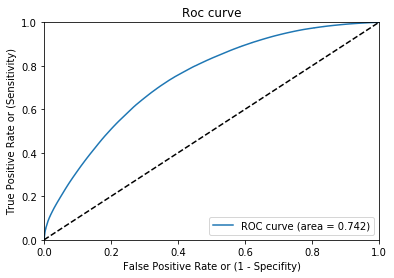

In [34]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Roc curve')
plt.legend(loc="lower right")

In [35]:
losss = [0.693147, 0.571287, 0.766104, 0.669030, 0.602868, 0.589184, 0.496034, 0.463791, 0.495888, 0.463125, 0.451685, 0.464525, 0.464936, 0.474145, 0.464003, 0.456674, 0.445918, 0.438978, 0.431879, 0.425513, 0.413515, 0.409382, 0.405557, 0.391744]

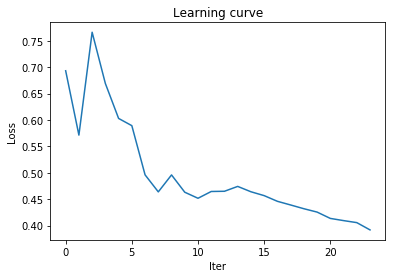

In [38]:
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.plot(range(len(losss)), losss)

## Вопрос третий

Как некоторую очень жадную эвристику можно делать случайный поиск: выбирать случайно некоторое количество фичей, над которым делать парные и тройные взаимодействия, считать качество на валидации, затем выбрать лучшие подвыборки и слить их в один сет.
Из него в свою очередь сделать еще несколько случайных подвыборок и взять лучшую.